In [1]:
import cv2 as cv
import numpy as np
from scipy.stats.kde import gaussian_kde
import matplotlib.pyplot as plt

In [2]:
img  = cv.imread("../dog.jpg")
img = img/255
img = cv.resize(img,(400,400))

In [13]:
cv.imshow('Original Image', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [4]:
# create Gaussian noise
x,y,c = img.shape
mean = 0
var = 0.01
sigma = np.sqrt(var)
n = np.random.normal(loc = mean, scale = sigma, size = (x,y,c))

In [14]:
cv.imshow('Gaussian noise', n)
cv.waitKey(0)
cv.destroyAllWindows()

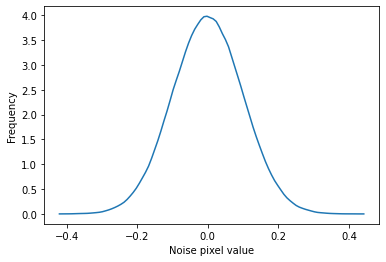

In [6]:
# display the probability density function (pdf)
kde = gaussian_kde(n.reshape(int(x*y*c)))
dist_space = np.linspace(np.min(n), np.max(n), 100)
plt.plot(dist_space, kde(dist_space))
plt.xlabel('Noise pixel value')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Add a Gaussian noise to the image
g = img + n

cv.imshow('Original Image', img)
cv.imshow('Corrupted Image', g)
cv.waitKey(0)
cv.destroyAllWindows()

In [16]:
# smoothing the corrupted image with averaging filter
averaging = cv.blur(g, (5,5))
cv.imshow('Original Image', img)
cv.imshow('Corrupted Image', g)
cv.imshow('Averaging', averaging)
cv.waitKey(0)
cv.destroyAllWindows()

In [17]:
# smoothing the corrupted image with median filter
g = g.astype('float32')
median = cv.medianBlur(g, 3)
cv.imshow('Original Image', img)
cv.imshow('Corrupted Image', g)
cv.imshow('Median', median)
cv.waitKey(0)
cv.destroyAllWindows()

In [18]:
# Sharpening using Perwitt filter
kernelX = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernelY = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
perwittX = cv.filter2D(img, -1, kernelX)
perwittY = cv.filter2D(img, -1, kernelY)
sharpenedPerwitt = img + perwittX + perwittY


cv.imshow('Original Image', img)
#cv.imshow('perwittX', perwittX)
#cv.imshow('PerwittY', perwittY)
cv.imshow('SharpenedPerwitt', sharpenedPerwitt)
cv.waitKey(0)
cv.destroyAllWindows()

In [19]:
# Sharpening using Sobel filter
sobelX = cv.Sobel(img, cv.CV_64F,1,0)
sobelY = cv.Sobel(img, cv.CV_64F,0,1)

SharpenedSobel = img + sobelX + sobelY

cv.imshow('Original Image', img)
#cv.imshow('sobelX', sobelX)
#cv.imshow('sobelY', sobelY)
cv.imshow('SharpenedSobel', SharpenedSobel)
cv.waitKey(0)
cv.destroyAllWindows()

In [20]:
cv.imshow('SharpenedPerwitt', sharpenedPerwitt)
cv.imshow('SharpenedSobel', SharpenedSobel)
cv.waitKey(0)
cv.destroyAllWindows()